Demonstrates getting RTT samples from TCP timestamps using the method described in "[New Methods for Passive Estimation of TCP Round-Trip Times](http://cobweb.cs.uga.edu/~kangli/src/pam05.pdf)"

In [26]:
STORE_PATH = '/tmp/anon-v4.hdf5' # Path to datapoints from `00_extract_flows.ipynb`

In [70]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from collections import namedtuple
from typing import Tuple

from rtt.rtts_from_timestamps import rtts_from_flow

In [71]:
with pd.HDFStore(STORE_PATH) as store:
    tcp_df = store['tcp_df']

In [72]:
# Group by flows and compute RTTs
rtt_df = pd.DataFrame()
tcp_df.set_index(['flow_hash', 'timestamp'])
for flow in tcp_df.groupby('flow_hash'):
    rtt_df = pd.concat([rtt_df, rtts_from_flow(flow)])

## Some stats

In [73]:
# First, convert the timedeltas to microsecond ints
rtt_df['rtt'] = rtt_df['rtt'] / np.timedelta64(1, 'us')

In [100]:
stats = rtt_df.groupby('flow_hash').agg({
       'rtt': ['mean', 'std', 'count']
})

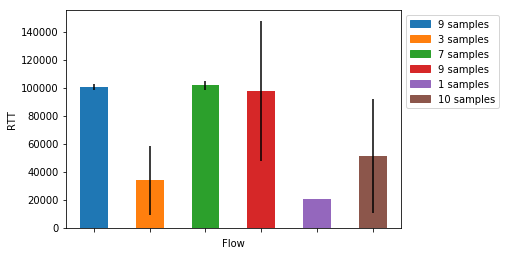

In [101]:
ax = stats['rtt']['mean'].plot(kind='bar', yerr=stats['rtt']['std'])
ax.set_xlabel('Flow')
ax.set_ylabel('RTT')
x_axis = ax.axes.get_xaxis()
x_axis.set_ticklabels([])


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
patches = [mpatches.Patch(color=colors[index], label=f'{row.count} samples') 
           for index, row in enumerate(stats['rtt'].itertuples())]
ax.legend(handles=patches, loc='upper left', bbox_to_anchor=(1, 1))

**TODO**

- How to prevent overestimation from wait times? Eg. discard segments with zero payload?